Import packages

In [13]:
import kneed
import kneed
import sklearn
from kneed import KneeLocator
from sklearn.cluster import KMeans
from collections import Counter
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas

Create data and data labels for each point

In [14]:
x = [4, 5, 10, 4, 3, 11, 14 , 6, 10, 12, 3, 3, 3, 3]
y = [21, 19, 24, 17, 16, 25, 24, 22, 21, 21, 21, 40, 40, 40]
data = list(zip(x, y))
labels = ["dog", "dog", "cat", "dog", "dog", "dog", "cat", "dog", "cat", "cat", "dog", "horse", "horse", "horse"] 

Create function that runs kmeans with a range of clusters with the data, test the accuracy (inertia) of different cluster numbers representing the raw data using the elbow method, return the optimal number of clusters

In [15]:
def K(data):
    inertias = []
    for i in range(1,11):
        kmeans = KMeans(n_clusters=i)
        kmeans.fit(data)
        inertias.append(kmeans.inertia_)

    kl = KneeLocator(range(1, 11), inertias, curve="convex", direction="decreasing")
    return kl.elbow

In [16]:
K(data)

3

Create function that plots kmeans data based on the data and elbow method

In [44]:
def plotKMeans(data, labels):
    import sklearn
    import matplotlib
    matplotlib.use('Qt5Agg')
    import matplotlib.pyplot as plt

    %matplotlib inline
    plt.scatter(x, y, c=labels)
    plt.legend()
    plt.show()

In [22]:
#plotKMeans(data)

labelClusters
Input:
data, and labels associated with data

as kmeans randomly assigns labels to its clusters, it is the job of labelCLusters to find which real label is associated with the randomly generated ones. It does this by first creating a dictionary (tDict) that observes how many times each real label occurs with a randomly generated one. Another dictionary (sDict) is used to find which label is most associated with which random value. 

returns: sDict gets returned.

In [49]:
def labelClusters(data, labels):
    import sklearn
    import collections
    from collections import Counter
    from sklearn.cluster import KMeans
    
    kmeans = KMeans(n_clusters=K(data))
    kmeans.fit(data)
    print(kmeans.labels_)
    print(labels)
    
    tDict = {}
    sDict = {}
    gSList = set(labels)
    glist = []
    
    if len(set(kmeans.labels_)) != len(gSList):
        return "ERROR: number of clusters does not match with number of labels!"
    
#make dictionary of unique labels associated with clusters to later measure which is more associated with what clusters
    for x in gSList:
        glist.append(x)
        for l in range(len(gSList)):
            tDict[x + str(l)] = 0 #initialize total dictionary
            sDict[x] = 0

    print('tDict=', tDict)
    print('sDict=', sDict)
            
#put the actual values into dictionary that counts the number of cluster instances for each    
    
    for b in range(len(labels)): 
        for t in tDict:
            if t[:len(t)-1] == labels[b] and t[len(t)-1:] == str(kmeans.labels_[b]):
                tDict[t] = tDict.get(t) + 1
    print('tDict', tDict)

    while len(glist) > 1:
        for x in range(len(gSList)-1):
            a = glist[0]
            for y in range(1, len(glist)):
                if tDict[a + str(x)] < tDict[glist[y] + str(x)]:
                    a = glist[y]
                sDict[a] = x
            glist.remove(a)
    sDict[glist[0]] = len(gSList)-1
    
                
    return sDict
    

In [50]:
labelClusters(data, labels)

[0 0 2 0 0 2 2 0 2 2 0 1 1 1]
['dog', 'dog', 'cat', 'dog', 'dog', 'dog', 'cat', 'dog', 'cat', 'cat', 'dog', 'horse', 'horse', 'horse']
tDict= {'dog0': 0, 'dog1': 0, 'dog2': 0, 'horse0': 0, 'horse1': 0, 'horse2': 0, 'cat0': 0, 'cat1': 0, 'cat2': 0}
sDict= {'dog': 0, 'horse': 0, 'cat': 0}
tDict {'dog0': 6, 'dog1': 0, 'dog2': 1, 'horse0': 0, 'horse1': 3, 'horse2': 0, 'cat0': 0, 'cat1': 0, 'cat2': 4}


{'dog': 0, 'horse': 1, 'cat': 2}

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


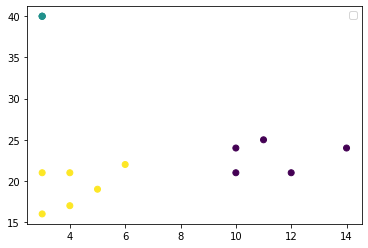

In [51]:
kmeans = KMeans(n_clusters=K(data))
kmeans.fit(data)
plotKMeans(data, kmeans.labels_)

In [10]:
""""           
    for t in range(len(glist)-1):
        if tDict[glist[t] + str(t)] > tDict[glist[t+1] + str(t)]:
            sDict[t] = glist[t]
            sDict[t+1] = glist[t+1]
        else:
            sDict[t] = glist[t+1]
            sDict[t+1] = glist[t]
"""

'"           \n    for t in range(len(glist)-1):\n        if tDict[glist[t] + str(t)] > tDict[glist[t+1] + str(t)]:\n            sDict[t] = glist[t]\n            sDict[t+1] = glist[t+1]\n        else:\n            sDict[t] = glist[t+1]\n            sDict[t+1] = glist[t]\n'